### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импортируем датасет load_boston

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

Разделяем датасет на тестовый и тренировочный в соответствии с заданием

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Нормализуем данные

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Импортируем модель TSNE и применяем её

In [6]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tnse.fit_transform(X_train_scaled)

Выводим результат на график

<function matplotlib.pyplot.show(*args, **kw)>

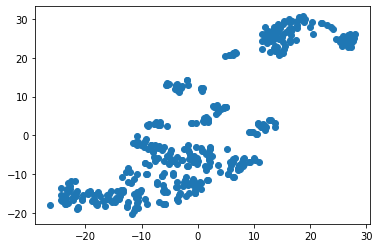

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Для того, чтобы разбить данные на кластеры необходимо импортировать модель
KMeans

In [8]:
from sklearn.cluster import KMeans

Произведем необходимые надстройки

In [9]:
# исправил ошибку для KMeans
# Старые параметры: (n_clusters=3, random_state=100)
kmeansmod = KMeans(n_clusters=3, max_iter=100, random_state=42) 

Применим настроенную модель к датафрейму X_train

In [10]:
labels_train = kmeansmod.fit_predict(X_train)

Построим график

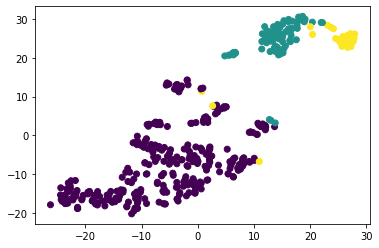

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Поскольку искомая величина являлась "price", определим её общее значение, а
также для каждого кластера из датафрейма y_train. 

In [12]:
y_train.mean()

price    22.796535
dtype: float64

In [13]:
y_train[labels_train==0].mean()

price    25.168687
dtype: float64

In [14]:
y_train[labels_train==1].mean()

price    17.442105
dtype: float64

In [15]:
y_train[labels_train==2].mean()

price    13.196774
dtype: float64

Значение CRIM будем брать из датафрейма исходных данных

In [16]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.40486282828282827

In [17]:
X_train.loc[labels_train==1, 'CRIM'].mean()

11.745661842105262

In [18]:
X_train.loc[labels_train==2, 'CRIM'].mean()

14.360380322580646